In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_parquet('../movevu.parquet')

In [46]:
df['RIDE_DATE'] = pd.to_datetime(df['RIDE_DATE'])

In [5]:
df2023 = df[df['RIDE_DATE'] > '2023-01-01']
print("Total Number of Vanderbilt Scans in the We Go Bus System in 2023:", df2023.shape[0])

dfcolumns_to_check = ['CAMPUS_ID', 'FIRST_NAME', 'LAST_NAME', 'EMPLOYEE_OR_STUDENT']
df2023_cleaned = df2023.dropna(subset=dfcolumns_to_check)

# number of unique CAMPUS_ID
print("Number of unique CAMPUS_ID in 2023:", df2023_cleaned['CAMPUS_ID'].nunique())
# export a csv into the csv folder of the top 1000 riders based upon campus_ID, also include CAMPUS_ID,FIRST_NAME,LAST_NAME,EMPLOYEE_OR_STUDENT. also include the routes they have ridden
# include CAMPUS_ID,FIRST_NAME,LAST_NAME,EMPLOYEE_OR_STUDENT,ROUTE
df2023_cleaned = df2023_cleaned.drop(columns=['CARD_ID_STATUS', 'RIDE_DATE', 'CARDOFFICE_CARD_NUMBER', 'RT_AREA', 'RUN', 'BUS'])
# add the count of the number of times a person has ridden the bus
df2023_cleaned['COUNT'] = df2023_cleaned.groupby('CAMPUS_ID')['CAMPUS_ID'].transform('count')

df_unique_routes = df2023_cleaned.groupby('CAMPUS_ID')['ROUTE'].apply(lambda x: sorted([route for route in pd.unique(x) if pd.notnull(route)])).reset_index(name='ROUTES_ARR')

df2023_cleaned = df2023_cleaned.drop(columns=['ROUTE'], errors='ignore')
df2023_with_routes = df2023_cleaned.drop_duplicates(subset=['CAMPUS_ID'])
df2023_with_routes = df2023_cleaned.merge(df_unique_routes, on='CAMPUS_ID', how='left')

# sort the dataframe by the number of times a person has ridden the bus
df2023_with_routes = df2023_with_routes.sort_values(by='COUNT', ascending=False)
df2023.drop_duplicates(subset=['CAMPUS_ID'])
# remove the duplicates from df2023_with_routes
df2023_with_routes = df2023_with_routes.drop_duplicates(subset=['CAMPUS_ID'])
# export to a csv
df2023_with_routes.to_csv('../csv/All_Riders_2023.csv', index=False)

Total Number of Vanderbilt Scans in the We Go Bus System in 2023: 344962
Number of unique CAMPUS_ID in 2023: 5065


In [47]:
df['MONTH_YEAR'] = df['RIDE_DATE'].dt.strftime('%Y-%m')

print("Max Date MM-YY", df['MONTH_YEAR'].max())
print(df['MONTH_YEAR'].unique())

Max Date MM-YY 2023-12
['2019-12' '2019-11' '2019-10' '2019-09' '2019-08' '2019-07' '2019-06'
 '2019-05' '2019-04' '2019-03' '2019-02' '2019-01' '2018-12' '2018-11'
 '2018-10' '2018-09' '2018-08' '2018-07' '2018-06' '2018-05' '2018-04'
 '2018-03' '2018-02' '2018-01' '2017-12' '2017-11' '2017-10' '2017-09'
 '2017-08' '2017-07' '2017-06' '2017-05' '2017-04' '2017-03' '2017-02'
 '2017-01' '2021-12' '2021-11' '2021-10' '2021-09' '2021-08' '2021-07'
 '2021-06' '2021-05' '2021-04' '2021-03' '2021-02' '2021-01' '2020-12'
 '2020-11' '2020-10' '2020-09' '2020-08' '2020-07' '2020-06' '2020-05'
 '2020-04' '2020-03' '2020-02' '2020-01' '2023-09' '2023-08' '2023-07'
 '2023-06' '2023-05' '2023-04' '2023-03' '2023-02' '2023-01' '2022-12'
 '2022-11' '2022-10' '2022-09' '2022-08' '2022-07' '2022-06' '2022-05'
 '2022-04' '2022-03' '2022-02' '2022-01' '2023-12' '2023-11' '2023-10']


In [10]:
print("All Columns in the Dataframe")
print(df.columns)

All Columns in the Dataframe
Index(['CARDOFFICE_CARD_NUMBER', 'CARD_ID_STATUS', 'RIDE_DATE', 'BUS', 'ROUTE',
       'RUN', 'RT_AREA', 'FIRST_NAME', 'LAST_NAME', 'EMPLOYEE_OR_STUDENT',
       'CAMPUS_ID', 'MONTH_YEAR'],
      dtype='object')


In [12]:
top6df = df.drop(['CARDOFFICE_CARD_NUMBER', 'CARD_ID_STATUS', 'RIDE_DATE', 'BUS', 'RUN', 'RT_AREA', 'FIRST_NAME', 'LAST_NAME', 'EMPLOYEE_OR_STUDENT', 'CAMPUS_ID'], axis=1)
check_pre_grouping = df[df['MONTH_YEAR'].isin(['2023-10', '2023-11', '2023-12'])]
print("Pre_grouping", check_pre_grouping['MONTH_YEAR'].unique())
# print all of the unique routes during the last 3 months of 2023
# print("check_pre_grouping", check_pre_grouping.head(100))

new = top6df.groupby(['MONTH_YEAR', 'ROUTE']).size().reset_index()
# print(new.tail(10))
# print(new['MONTH_YEAR'].unique())
# check_months = new[new['MONTH_YEAR'].isin(['2023-10', '2023-11', '2023-12'])]
# print(check_months['MONTH_YEAR'].unique())

Pre_grouping ['2023-12' '2023-11' '2023-10']


In [54]:
# bar graph of the most rides in the last 3 months of 2023
# print(new)
# print(new['MONTH_YEAR'].unique())
# keep only the 2022 scans

df_cleaned = df.dropna(subset=['CAMPUS_ID', 'FIRST_NAME', 'LAST_NAME', 'EMPLOYEE_OR_STUDENT', 'ROUTE'])
print("Total Number of Vanderbilt Scans in the We Go Bus System (2022):", df_cleaned.shape[0])


# sort the 2022 scans by id
df_cleaned = df_cleaned.sort_values(by=['CAMPUS_ID'])
df_cleaned = df_cleaned.reset_index(drop=True)
# count how many each person scanned, and keep the first and last name as well
df_cleaned_list = df_cleaned.groupby(['CAMPUS_ID', 'FIRST_NAME','LAST_NAME','EMPLOYEE_OR_STUDENT']).size().reset_index(name='COUNT')
# create a routes category for each person
df_cleaned_list['ROUTES'] = df_cleaned_list['CAMPUS_ID'].map(df_cleaned.groupby('CAMPUS_ID')['ROUTE'].apply(list))

# only keep the unique routes in the routes
df_cleaned_list['ROUTES'] = df_cleaned_list['ROUTES'].apply(lambda x: list(set(x)))

# print(df_2022List.to_string())
df_cleaned_list = df_cleaned_list.drop_duplicates(subset=['CAMPUS_ID'])
# sort the 2022 scans by id
df_cleaned_list = df_cleaned_list.sort_values(by=['COUNT'], ascending=False)
print("Total Number of Unique Vanderbilt Scans in the We Go Bus System (2022):", len(df_cleaned_list['CAMPUS_ID'].unique()))


Total Number of Vanderbilt Scans in the We Go Bus System (2022): 1238836
Total Number of Unique Vanderbilt Scans in the We Go Bus System (2022): 16339


Freedman–Diaconis number of bins: 2715


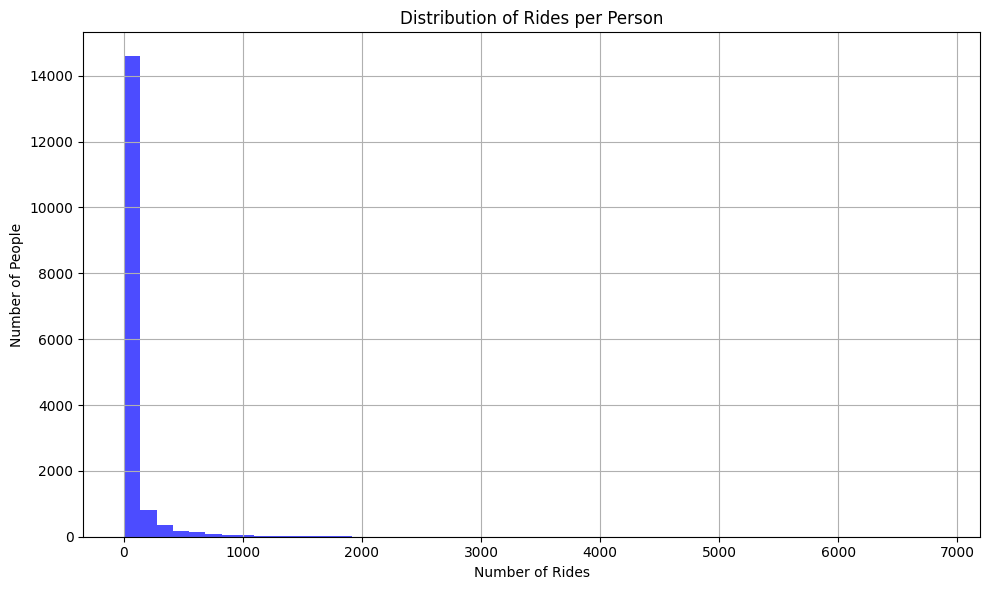

Freedman–Diaconis number of bins (log): 42


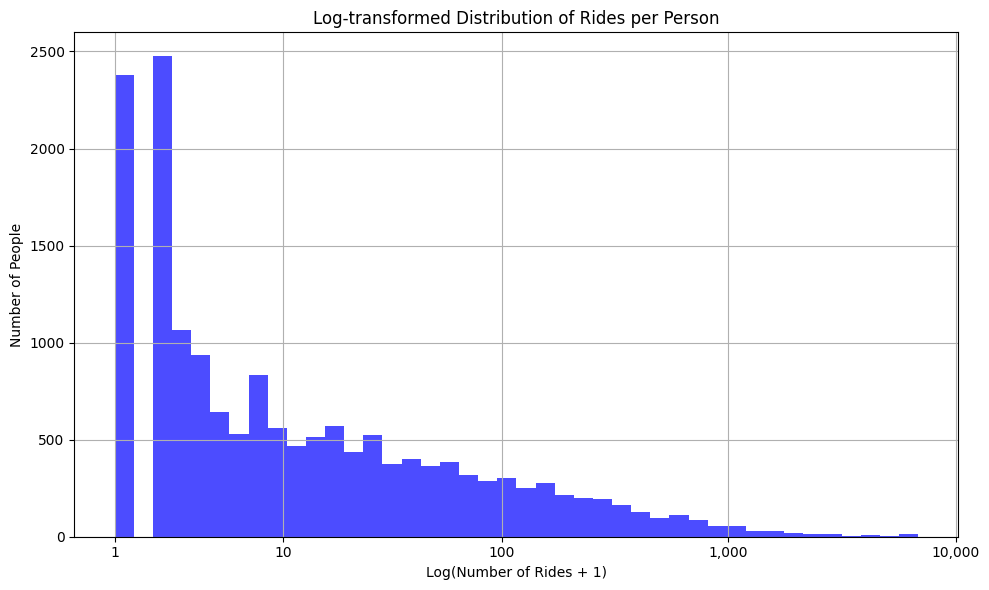

In [34]:
# Extract the 'COUNT' column which has the number of rides per person
ride_counts = df_cleaned_list['COUNT']

q25, q75 = np.percentile(ride_counts, [25, 75])
bin_width = 2 * (q75 - q25) * len(ride_counts) ** (-1/3)
bins = round((ride_counts.max() - ride_counts.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

# Generate the histogram
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
plt.hist(ride_counts, bins=50, alpha=0.7, color='blue')  # Adjust the number of bins as needed

# Add title and labels
plt.title('Distribution of Rides per Person')
plt.xlabel('Number of Rides')
plt.ylabel('Number of People')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Log Transformation
ride_counts_log = np.log1p(ride_counts)  # log1p is used to handle zero rides case

# Calculate bins using the transformed data
q25, q75 = np.percentile(ride_counts_log, [25, 75])
bin_width = 2 * (q75 - q25) * len(ride_counts_log) ** (-1/3)
bins_log = round((ride_counts_log.max() - ride_counts_log.min()) / bin_width)
print("Freedman–Diaconis number of bins (log):", bins_log)

# Generate the histogram for log-transformed data
plt.figure(figsize=(10, 6))
plt.hist(ride_counts_log, bins=bins_log, alpha=0.7, color='blue')

# Add title and labels
plt.title('Log-transformed Distribution of Rides per Person')
plt.xlabel('Log(Number of Rides + 1)')
plt.ylabel('Number of People')

# Set x-ticks to be more interpretable
plt.xticks(ticks=np.log1p([1, 10, 100, 1000, 10000]), labels=['1', '10', '100', '1,000', '10,000'])

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


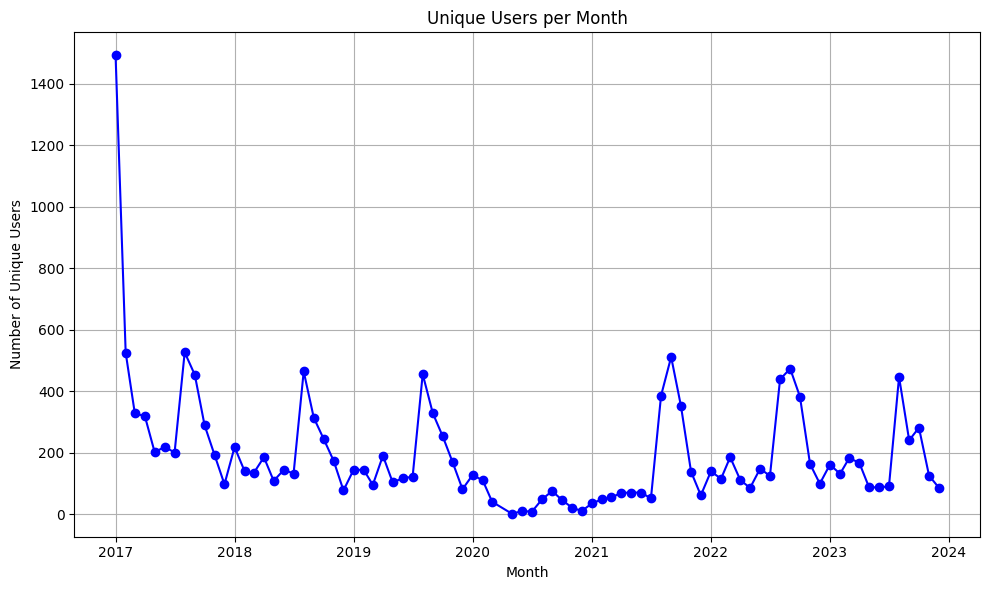

In [55]:
# graph the unique users per month
df_cleaned['RIDE_DATE'] = pd.to_datetime(df_cleaned['RIDE_DATE'])
df_cleaned['MONTH_YEAR'] = df_cleaned['RIDE_DATE'].dt.strftime('%Y-%m')
df_cleaned['MONTH_YEAR'] = pd.to_datetime(df_cleaned['MONTH_YEAR'])
uniqueuserspermonth = df_cleaned.sort_values(by='MONTH_YEAR')
uniqueuserspermonth = uniqueuserspermonth.reset_index(drop=True)
uniqueuserspermonth = uniqueuserspermonth.drop_duplicates(subset=['CAMPUS_ID'])
uniqueuserspermonth = uniqueuserspermonth.groupby(['MONTH_YEAR']).size().reset_index(name='COUNT')
uniqueuserspermonth = uniqueuserspermonth.sort_values(by='MONTH_YEAR')
uniqueuserspermonth = uniqueuserspermonth.reset_index(drop=True)
# print(df_cleaned)
plt.figure(figsize=(10, 6))
plt.plot(uniqueuserspermonth['MONTH_YEAR'], uniqueuserspermonth['COUNT'], marker='o', color='b')
plt.title('Unique Users per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.tight_layout()
plt.show()


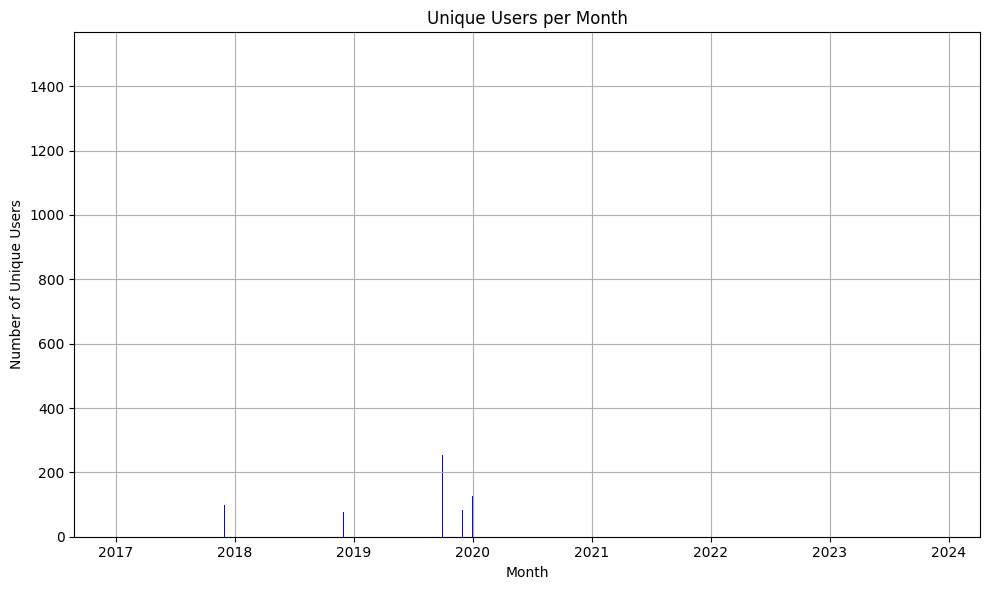

Unique Users per Month
   MONTH_YEAR  COUNT
0  2017-01-01   1493
1  2017-02-01    526
2  2017-03-01    329
3  2017-04-01    319
4  2017-05-01    202
5  2017-06-01    220
6  2017-07-01    201
7  2017-08-01    527
8  2017-09-01    454
9  2017-10-01    290
10 2017-11-01    192
11 2017-12-01     98
12 2018-01-01    219
13 2018-02-01    140
14 2018-03-01    135
15 2018-04-01    186
16 2018-05-01    109
17 2018-06-01    145
18 2018-07-01    133
19 2018-08-01    465
20 2018-09-01    314
21 2018-10-01    246
22 2018-11-01    174
23 2018-12-01     78
24 2019-01-01    145
25 2019-02-01    145
26 2019-03-01     96
27 2019-04-01    191
28 2019-05-01    104
29 2019-06-01    118
30 2019-07-01    122
31 2019-08-01    456
32 2019-09-01    329
33 2019-10-01    255
34 2019-11-01    169
35 2019-12-01     82
36 2020-01-01    128
37 2020-02-01    111
38 2020-03-01     41
39 2020-05-01      2
40 2020-06-01     11
41 2020-07-01      9
42 2020-08-01     49
43 2020-09-01     76
44 2020-10-01     47
45 2020-11-

In [58]:
# make a bar graph of the number of unique users per month
plt.figure(figsize=(10, 6))
plt.bar(uniqueuserspermonth['MONTH_YEAR'], uniqueuserspermonth['COUNT'], color='b')
plt.title('Unique Users per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Unique Users per Month")
print(uniqueuserspermonth.to_string())  

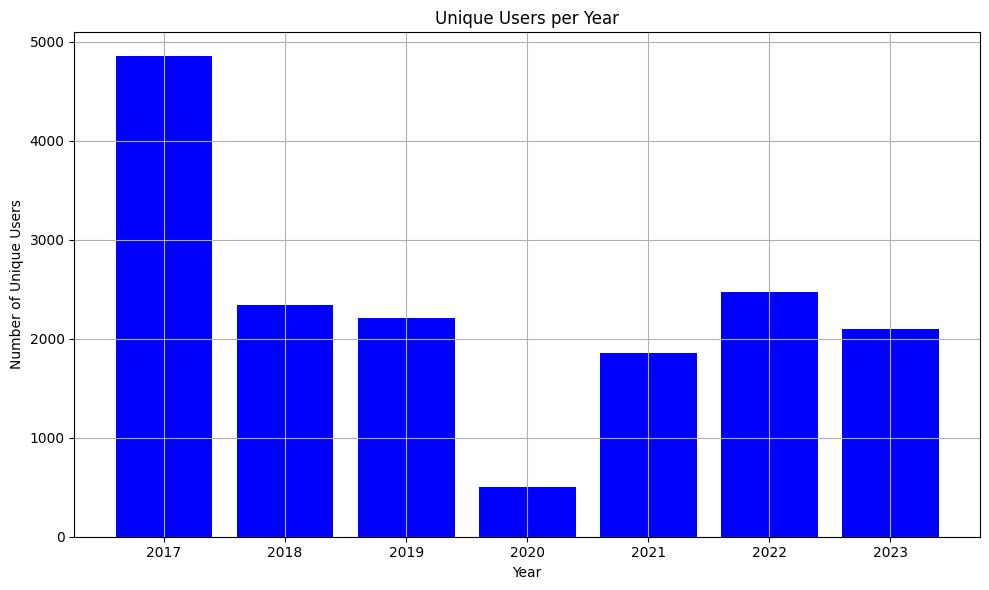

In [60]:
# generate a bar graph of the number of unique users per year
df_cleaned['YEAR'] = df_cleaned['RIDE_DATE'].dt.strftime('%Y')
uniqueusersperyear = df_cleaned.sort_values(by='YEAR')
uniqueusersperyear = uniqueusersperyear.reset_index(drop=True)
uniqueusersperyear = uniqueusersperyear.drop_duplicates(subset=['CAMPUS_ID'])
uniqueusersperyear = uniqueusersperyear.groupby(['YEAR']).size().reset_index(name='COUNT')
uniqueusersperyear = uniqueusersperyear.sort_values(by='YEAR')
uniqueusersperyear = uniqueusersperyear.reset_index(drop=True)
# print(df_cleaned)
plt.figure(figsize=(10, 6))
plt.bar(uniqueusersperyear['YEAR'], uniqueusersperyear['COUNT'], color='b')
plt.title('Unique Users per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.tight_layout()
plt.show()

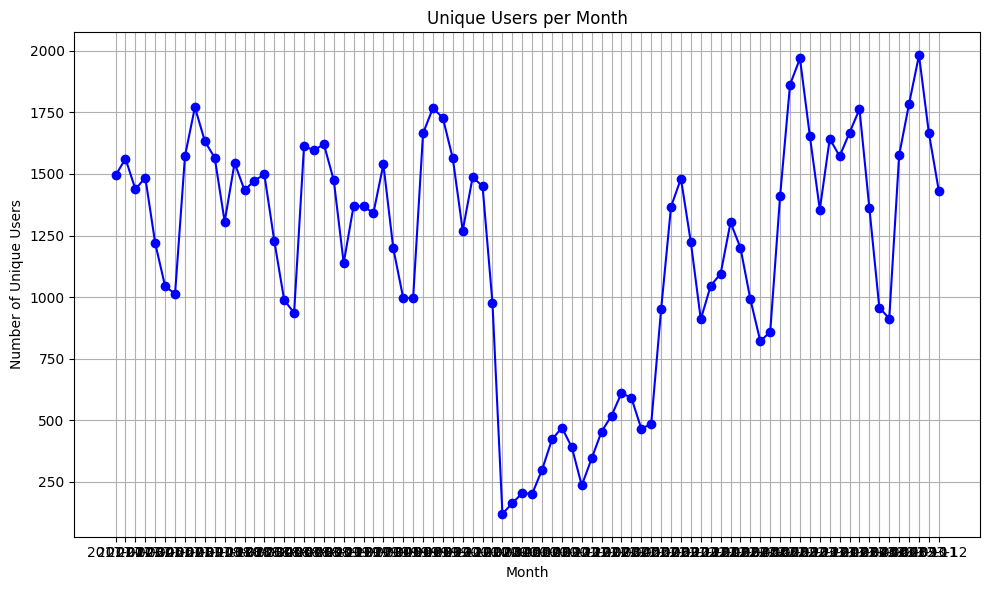

In [61]:
# Process to get unique users per month
unique_users_per_month = (
        df.drop_duplicates(subset=['CAMPUS_ID', 'MONTH_YEAR'])
        .groupby(['MONTH_YEAR'])
        .size()
        .reset_index(name='UNIQUE_USERS')
    )
# plot this in a graph
plt.figure(figsize=(10, 6))
plt.plot(unique_users_per_month['MONTH_YEAR'], unique_users_per_month['UNIQUE_USERS'], marker='o', color='b')
plt.title('Unique Users per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.tight_layout()
plt.show()
